In [1]:
import requests
import json
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from qgridnext import show_grid
from datetime import datetime, timedelta
import sys  
import os
import pandas_ta as ta
import sklearn as sk

# Ensure the directories are in the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Data_Management')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Universe_Selection')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Signal_Generation')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Risk_Management')))

# Import the modules
from data import Data
from calculations import Calculations
from coarse import Coarse_1 as Coarse
from fine import Fine_1 as Fine
from entry_signal import Trend_Following, Mean_Reversion
from tail_risk import Stop_Loss, Take_Profit
from manage_trade import Manage_Trade
from position import Position

In [2]:
symbols = ['BTCUSDT', 'ETHUSDT']
start_time = dt.datetime(2024, 1, 1)
end_time = dt.datetime(2024, 2, 1)
timeframe = '1h'
data = Data(symbols, timeframe, start_time, end_time).df
#Perform coarse analysis and filtering
coarse = Coarse()
df = coarse.volume_flag(data, 1000)
df = coarse.sort_by_volume(df)
df = coarse.sort_by_std(df, 2, 2)
fine = Fine()
df = fine.above_ema(df, 2)
#Generate a signal
tf = Trend_Following()
mr = Mean_Reversion()
str_length = 10
str_mult = 3
_df = tf.supertrend_signals(df, str_length, str_mult)

pos = Position(_df, _min = 0, _max = 2)
_df = pos.initialize_position()
_df

close  creturns      high  log_return  \
date                                                                    
2023-12-31 19:00:00 BTCUSDT  42475.23       NaN  42554.57         NaN   
                    ETHUSDT   2295.51       NaN   2297.18         NaN   
2023-12-31 20:00:00 BTCUSDT  42613.56  1.003257  42775.00    0.003251   
                    ETHUSDT   2303.72  1.003577   2306.60    0.003570   
2023-12-31 21:00:00 BTCUSDT  42581.10  1.002493  42638.41   -0.000762   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open     price   returns  \
date                                                                  
2023-12-31 19:00:00 BTCUSDT  42261.02  42283.58  42475.23       NaN   
                    ETHUSDT   2281.27   2281.87   2295.51       NaN   
2023-12-31 20:00:00 BTCUSDT  42431.65  42475.23  42613.56  0.003257   
                    ETHUSDT   2292.90   2295.52   2303.72  0.003577   
2023-12-31 21:00:00 BTCUSDT  42500.00  42613.57  42581.10 -0.000762   
...                               ...       ...       ...       ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98   2279.00 -0.003925   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  42656.07  0.003976   
                    ETHUSDT   2269.03   2278.99   2285.75  0.002962   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07  42580.00 -0.001783   
                    ETHUSDT   2281.88   2285.75   2283.14 -0.001142   

                                  volume  volume_in_dollars  ...  \
date                                                         ...   
2023-12-31 19:00:00 BTCUSDT   1271.68108       5.401495e+07  ...   
                    ETHUSDT  10771.91830       2.472705e+07  ...   
2023-12-31 20:00:00 BTCUSDT   1196.37856       5.098195e+07  ...   
                    ETHUSDT   8413.42600       1.938218e+07  ...   
2023-12-31 21:00:00 BTCUSDT    685.21980       2.917741e+07  ...   
...                                  ...                ...  ...   
2024-01-31 16:00:00 ETHUSDT  23011.28190       5.244271e+07  ...   
2024-01-31 17:00:00 BTCUSDT   1398.31850       5.964677e+07  ...   
                    ETHUSDT  10362.16650       2.368532e+07  ...   
2024-01-31 18:00:00 BTCUSDT   1257.92790       5.356257e+07  ...   
                    ETHUSDT   9636.50420       2.200149e+07  ...   

                             SUPERTl_10_3.0  SUPERTs_10_3.0  entry_signal  \
date                                                                        
2023-12-31 19:00:00 BTCUSDT             NaN             NaN           0.0   
                    ETHUSDT             NaN             NaN           0.0   
2023-12-31 20:00:00 BTCUSDT             NaN             NaN           0.0   
                    ETHUSDT             NaN             NaN           0.0   
2023-12-31 21:00:00 BTCUSDT             NaN             NaN           0.0   
...                                     ...             ...           ...   
2024-01-31 16:00:00 ETHUSDT             NaN     2346.264505           0.0   
2024-01-31 17:00:00 BTCUSDT             NaN    43680.887427           0.0   
                    ETHUSDT             NaN     2345.623055           0.0   
2024-01-31 18:00:00 BTCUSDT             NaN    43680.887427           0.0   
                    ETHUSDT             NaN     2345.623055           0.0   

                             position  trades  log_price_return  strategy  \
date                                                                        
2023-12-31 19:00:00 BTCUSDT       0.0       0               NaN       NaN   
                    ETHUSDT       0.0   

In [ ]:
_df.position

date                        
2023-12-31 19:00:00  BTCUSDT    0.0
                     ETHUSDT    0.0
2023-12-31 20:00:00  BTCUSDT    0.0
                     ETHUSDT    0.0
2023-12-31 21:00:00  BTCUSDT    0.0
                               ... 
2024-01-31 16:00:00  ETHUSDT    6.0
2024-01-31 17:00:00  BTCUSDT    8.0
                     ETHUSDT    6.0
2024-01-31 18:00:00  BTCUSDT    8.0
                     ETHUSDT    6.0
Name: position, Length: 1488, dtype: float64

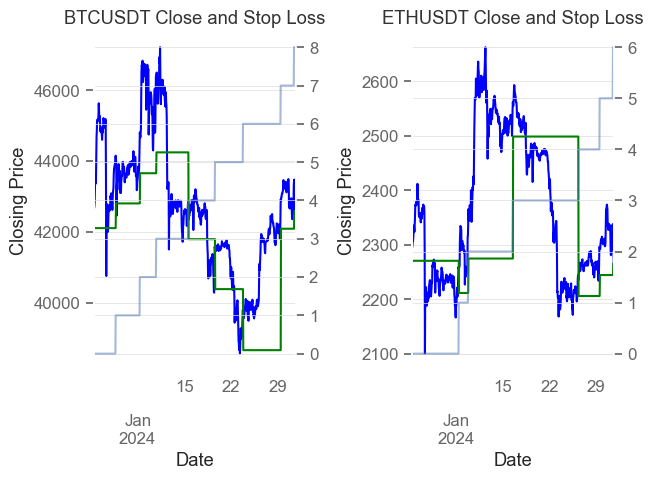

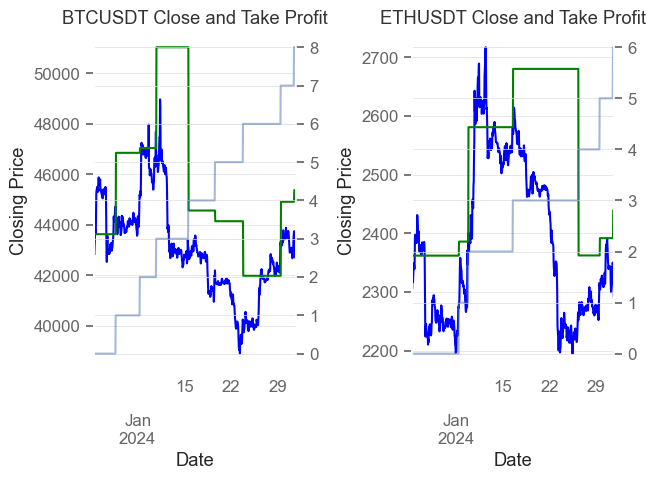

close  creturns      high  log_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT  42612.24  1.003226  42715.55   -0.002421   
                    ETHUSDT   2300.99  1.002387   2305.11   -0.001377   
2024-01-01 10:00:00 BTCUSDT  42783.05  1.007247  42847.07    0.004000   
                    ETHUSDT   2314.70  1.008360   2318.34    0.005941   
2024-01-01 11:00:00 BTCUSDT  42725.15  1.005884  42856.00   -0.001354   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open         price   returns  \
date                                                                      
2024-01-01 09:00:00 BTCUSDT  42580.00  42715.54  42612.240000 -0.002418   
                    ETHUSDT   2294.84   2304.16   2300.990000 -0.001376   
2024-01-01 10:00:00 BTCUSDT  42586.51  42612.24  42783.050000  0.004008   
                    ETHUSDT   2299.20   2300.99   2314.700000  0.005958   
2024-01-01 11:00:00 BTCUSDT  42664.42  42783.05  42725.150000 -0.001353   
...                               ...       ...           ...       ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98   2265.348562 -0.003925   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  42656.070000  0.003976   
                    ETHUSDT   2269.03   2278.99   2285.750000  0.002962   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07  42580.000000 -0.001783   
                    ETHUSDT   2281.88   2285.75   2283.140000 -0.001142   

                                  volume  volume_in_dollars  ...  \
date                                                         ...   
2024-01-01 09:00:00 BTCUSDT    711.01152       3.029779e+07  ...   
                    ETHUSDT   7316.25750       1.683464e+07  ...   
2024-01-01 10:00:00 BTCUSDT    942.70163       4.033165e+07  ...   
                    ETHUSDT  12303.53440       2.847899e+07  ...   
2024-01-01 11:00:00 BTCUSDT    918.71056       3.925205e+07  ...   
...                                  ...                ...  ...   
2024-01-31 16:00:00 ETHUSDT  23011.28190       5.244271e+07  ...   
2024-01-31 17:00:00 BTCUSDT   1398.31850       5.964677e+07  ...   
                    ETHUSDT  10362.16650       2.368532e+07  ...   
2024-01-31 18:00:00 BTCUSDT   1257.92790       5.356257e+07  ...   
                    ETHUSDT   9636.50420       2.200149e+07  ...   

                             session_compound  overall_session_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT               NaN               -0.002540   
                    ETHUSDT               NaN               -0.001894   
2024-01-01 10:00:00 BTCUSDT          1.000000               -0.002540   
                    ETHUSDT          1.000000               -0.001894   
2024-01-01 11:00:00 BTCUSDT          1.000000               -0.002540   
...                                       ...                     ...   
2024-01-31 16:00:00 ETHUSDT          0.832503               -0.127489   
2024-01-31 17:00:00 BTCUSDT          0.821863               -0.189789   
                    ETHUSDT          0.878513               -0.127489   
2024-01-31 18:00:00 BTCUSDT          0.810211               -0.189789   
                    ETHUSDT          0.872511               -0.127489   

                                    atr     stop_loss  session_stop_loss  \
date                                                                       
2024-01-01 09:00:00 BTCUSDT  169.721566  42103.075302       42103.075302   
                    ETHUSDT   10.174832   2

In [ ]:
sl = Stop_Loss(_df, sl_type='atr', indicator_length=14, sl_mult=3, signal_only = True)
_df = sl.apply_stop_loss(fixed = True, plot = True)
tp = Take_Profit(_df, 'rr', 2, signal_only = True)
_df = tp.apply_take_profit(fixed = True, plot = True)
_df

In [ ]:
_df.position

date                        
2024-01-01 09:00:00  BTCUSDT    0.0
                     ETHUSDT    0.0
2024-01-01 10:00:00  BTCUSDT    0.0
                     ETHUSDT    0.0
2024-01-01 11:00:00  BTCUSDT    0.0
                               ... 
2024-01-31 16:00:00  ETHUSDT    6.0
2024-01-31 17:00:00  BTCUSDT    8.0
                     ETHUSDT    6.0
2024-01-31 18:00:00  BTCUSDT    8.0
                     ETHUSDT    6.0
Name: position, Length: 1460, dtype: float64

In [ ]:
cal = Calculations()
_df = cal.merge_cols(_df, common = 'exit_signal', use_clip = True)

In [ ]:
_df.position

date                        
2024-01-01 09:00:00  BTCUSDT    0.0
                     ETHUSDT    0.0
2024-01-01 10:00:00  BTCUSDT    0.0
                     ETHUSDT    0.0
2024-01-01 11:00:00  BTCUSDT    0.0
                               ... 
2024-01-31 16:00:00  ETHUSDT    6.0
2024-01-31 17:00:00  BTCUSDT    8.0
                     ETHUSDT    6.0
2024-01-31 18:00:00  BTCUSDT    8.0
                     ETHUSDT    6.0
Name: position, Length: 1460, dtype: float64

In [ ]:
_df = pos.calculate_position(_df)
_df

close  creturns      high  log_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT  42612.24  1.003226  42715.55   -0.002421   
                    ETHUSDT   2300.99  1.002387   2305.11   -0.001377   
2024-01-01 10:00:00 BTCUSDT  42783.05  1.007247  42847.07    0.004000   
                    ETHUSDT   2314.70  1.008360   2318.34    0.005941   
2024-01-01 11:00:00 BTCUSDT  42725.15  1.005884  42856.00   -0.001354   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open         price   returns  \
date                                                                      
2024-01-01 09:00:00 BTCUSDT  42580.00  42715.54  42612.240000 -0.002418   
                    ETHUSDT   2294.84   2304.16   2300.990000 -0.001376   
2024-01-01 10:00:00 BTCUSDT  42586.51  42612.24  42783.050000  0.004008   
                    ETHUSDT   2299.20   2300.99   2314.700000  0.005958   
2024-01-01 11:00:00 BTCUSDT  42664.42  42783.05  42725.150000 -0.001353   
...                               ...       ...           ...       ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98   2265.348562 -0.003925   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  42656.070000  0.003976   
                    ETHUSDT   2269.03   2278.99   2285.750000  0.002962   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07  42580.000000 -0.001783   
                    ETHUSDT   2281.88   2285.75   2283.140000 -0.001142   

                                  volume  volume_in_dollars  ...  \
date                                                         ...   
2024-01-01 09:00:00 BTCUSDT    711.01152       3.029779e+07  ...   
                    ETHUSDT   7316.25750       1.683464e+07  ...   
2024-01-01 10:00:00 BTCUSDT    942.70163       4.033165e+07  ...   
                    ETHUSDT  12303.53440       2.847899e+07  ...   
2024-01-01 11:00:00 BTCUSDT    918.71056       3.925205e+07  ...   
...                                  ...                ...  ...   
2024-01-31 16:00:00 ETHUSDT  23011.28190       5.244271e+07  ...   
2024-01-31 17:00:00 BTCUSDT   1398.31850       5.964677e+07  ...   
                    ETHUSDT  10362.16650       2.368532e+07  ...   
2024-01-31 18:00:00 BTCUSDT   1257.92790       5.356257e+07  ...   
                    ETHUSDT   9636.50420       2.200149e+07  ...   

                             overall_session_return         atr     stop_loss  \
date                                                                            
2024-01-01 09:00:00 BTCUSDT               -0.002540  169.721566  42103.075302   
                    ETHUSDT               -0.001894   10.174832   2270.465503   
2024-01-01 10:00:00 BTCUSDT               -0.002540  179.391771  42244.874687   
                    ETHUSDT               -0.001894   11.129219   2281.312342   
2024-01-01 11:00:00 BTCUSDT               -0.002540  180.645360  42183.213919   
...                                             ...         ...           ...   
2024-01-31 16:00:00 ETHUSDT               -0.127489   21.293798   2215.118607   
2024-01-31 17:00:00 BTCUSDT               -0.189789  362.404471  41568.856586   
                    ETHUSDT               -0.127489   21.123526   2222.379421   
2024-01-31 18:00:00 BTCUSDT               -0.189789  346.048438  41541.854687   
                    ETHUSDT               -0.127489   20.116846   2222.789462   

                             session_stop_loss  exit_signal_sl  cstrategy  \
date                                                                        
2024-01-01 09

In [ ]:
_df.position

date                        
2024-01-01 09:00:00  BTCUSDT    NaN
                     ETHUSDT    NaN
2024-01-01 10:00:00  BTCUSDT    0.0
                     ETHUSDT    0.0
2024-01-01 11:00:00  BTCUSDT    0.0
                               ... 
2024-01-31 16:00:00  ETHUSDT    1.0
2024-01-31 17:00:00  BTCUSDT    0.0
                     ETHUSDT    0.0
2024-01-31 18:00:00  BTCUSDT    0.0
                     ETHUSDT    0.0
Name: position, Length: 1460, dtype: float64

In [ ]:
mt = Manage_Trade(_df)
_df = mt.erw_actual_allocation(0.01, 1000)
_df

close  creturns      high  log_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT  42612.24  1.003226  42715.55   -0.002421   
                    ETHUSDT   2300.99  1.002387   2305.11   -0.001377   
2024-01-01 10:00:00 BTCUSDT  42783.05  1.007247  42847.07    0.004000   
                    ETHUSDT   2314.70  1.008360   2318.34    0.005941   
2024-01-01 11:00:00 BTCUSDT  42725.15  1.005884  42856.00   -0.001354   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open         price   returns  \
date                                                                      
2024-01-01 09:00:00 BTCUSDT  42580.00  42715.54  42612.240000 -0.002418   
                    ETHUSDT   2294.84   2304.16   2300.990000 -0.001376   
2024-01-01 10:00:00 BTCUSDT  42586.51  42612.24  42783.050000  0.004008   
                    ETHUSDT   2299.20   2300.99   2314.700000  0.005958   
2024-01-01 11:00:00 BTCUSDT  42664.42  42783.05  42725.150000 -0.001353   
...                               ...       ...           ...       ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98   2265.348562 -0.003925   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  42656.070000  0.003976   
                    ETHUSDT   2269.03   2278.99   2285.750000  0.002962   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07  42580.000000 -0.001783   
                    ETHUSDT   2281.88   2285.75   2283.140000 -0.001142   

                                  volume  volume_in_dollars  ...  \
date                                                         ...   
2024-01-01 09:00:00 BTCUSDT    711.01152       3.029779e+07  ...   
                    ETHUSDT   7316.25750       1.683464e+07  ...   
2024-01-01 10:00:00 BTCUSDT    942.70163       4.033165e+07  ...   
                    ETHUSDT  12303.53440       2.847899e+07  ...   
2024-01-01 11:00:00 BTCUSDT    918.71056       3.925205e+07  ...   
...                                  ...                ...  ...   
2024-01-31 16:00:00 ETHUSDT  23011.28190       5.244271e+07  ...   
2024-01-31 17:00:00 BTCUSDT   1398.31850       5.964677e+07  ...   
                    ETHUSDT  10362.16650       2.368532e+07  ...   
2024-01-31 18:00:00 BTCUSDT   1257.92790       5.356257e+07  ...   
                    ETHUSDT   9636.50420       2.200149e+07  ...   

                             session_stop_loss  exit_signal_sl  cstrategy  \
date                                                                        
2024-01-01 09:00:00 BTCUSDT       42103.075302               0        NaN   
                    ETHUSDT        2270.465503               0        NaN   
2024-01-01 10:00:00 BTCUSDT       42103.075302               0   1.000000   
                    ETHUSDT        2270.465503               0   1.000000   
2024-01-01 11:00:00 BTCUSDT       42103.075302               0   1.000000   
...                                        ...             ...        ...   
2024-01-31 16:00:00 ETHUSDT        2265.348562               1   0.813244   
2024-01-31 17:00:00 BTCUSDT       42582.433756               0   0.864062   
                    ETHUSDT        2265.348562               0   0.858190   
2024-01-31 18:00:00 BTCUSDT       42582.433756               0   0.851811   
                    ETHUSDT        2265.348562               0   0.852327   

                              take_profit  session_take_profit  \
date                                                             
2024-01-01 09:00:00 BTCUSDT  43630.569396         43630.569396   
                    E

In [ ]:
for_testing = _df.copy()

In [ ]:
_df.position.value_counts()

position
0.0    966
1.0    459
2.0     33
Name: count, dtype: int64

---

## Position Sizing

- Factors: distance to stop loss (in our case, we are using the atr which is a measure of volatility)
- Method: Equal Risk Weighting
- Method of Updating: Scaling-out (partial take profits)

Steps:

Write a function:\
Input: df, maximum risk percentage per trade, maximum dollar allocation per trade\
Output: Actual allocation per trade

- Make a function that calculates the actual allocation allocation per trade
- Make 2 columns: one for the position size at any time, and another for the current size of the trade for each trading session accounting for cumualtive returns. 
-> Note that we don't need to calculate the position size at the beginning of each session as this formula applies applies whenever we "can" enter a trade. 

For the position sizing function:
1. Make sure that the required indicator (in this case it is the atr) is there
2. Calculate the distance from the entry (in this case it is the close) to the atr value (as we are looking normalize positions using volatility)
3. Normalize the distance relative to the close, to get the percent distance
4. Calculates the max_dollar_risk from the given inputs
3. Apply the formula: max_dollar_risk / percent distance = actual allocation

For the first column:
1. Ensure that there is the required indicator (ATR) otherwise calculate it
2. Apply the function to each row

For the 2nd column:
1. Apply the function for each session
2. multiply cumulative return * current position size * position size at the first of the sesion

#### Make Position sizing function

In [51]:
_df = _df.unstack()

In [52]:
test = _df

In [53]:
test

close           creturns                high           \
                      BTCUSDT  ETHUSDT   BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT   
date                                                                            
2024-01-01 09:00:00  42612.24  2300.99  1.003226  1.002387  42715.55  2305.11   
2024-01-01 10:00:00  42783.05  2314.70  1.007247  1.008360  42847.07  2318.34   
2024-01-01 11:00:00  42725.15  2309.89  1.005884  1.006264  42856.00  2319.55   
2024-01-01 12:00:00  42812.70  2313.76  1.007945  1.007950  42824.90  2317.09   
2024-01-01 13:00:00  43111.10  2326.90  1.014970  1.013675  43208.86  2331.77   
...                       ...      ...       ...       ...       ...      ...   
2024-01-31 14:00:00  43334.64  2323.38  1.020233  1.012141  43551.99  2342.26   
2024-01-31 15:00:00  42541.18  2287.98  1.001553  0.996720  43361.10  2324.67   
2024-01-31 16:00:00  42487.12  2279.00  1.000280  0.992808  42707.68  2292.37   
2024-01-31 17:00:00  42656.07  2285.75  1.004258  0.995748  42690.42  2287.94   
2024-01-31 18:00:00  42580.00  2283.14  1.002467  0.994611  42688.88  2288.91   

                    log_return                 low           ...  \
                       BTCUSDT   ETHUSDT   BTCUSDT  ETHUSDT  ...   
date                                                         ...   
2024-01-01 09:00:00  -0.002421 -0.001377  42580.00  2294.84  ...   
2024-01-01 10:00:00   0.004000  0.005941  42586.51  2299.20  ...   
2024-01-01 11:00:00  -0.001354 -0.002080  42664.42  2306.53  ...   
2024-01-01 12:00:00   0.002047  0.001674  42704.42  2306.48  ...   
2024-01-01 13:00:00   0.006946  0.005663  42812.70  2313.76  ...   
...                        ...       ...       ...      ...  ...   
2024-01-31 14:00:00  -0.004116 -0.005259  43041.10  2309.51  ...   
2024-01-31 15:00:00  -0.018480 -0.015354  42519.92  2286.11  ...   
2024-01-31 16:00:00  -0.001272 -0.003933  42276.84  2263.57  ...   
2024-01-31 17:00:00   0.003969  0.002957  42381.10  2269.03  ...   
2024-01-31 18:00:00  -0.001785 -0.001143  42555.46  2281.88  ...   

                    session_stop_loss                trade         cstrategy  \
                              BTCUSDT      ETHUSDT BTCUSDT ETHUSDT   BTCUSDT   
date                                                                           
2024-01-01 09:00:00      42103.075302  2270.465503     1.0     1.0  0.997585   
2024-01-01 10:00:00      42103.075302  2270.465503     NaN     NaN  1.001591   
2024-01-01 11:00:00      42103.075302  2270.465503     NaN     NaN  1.000237   
2024-01-01 12:00:00      42103.075302  2270.465503     NaN     NaN  1.002289   
2024-01-01 13:00:00      42103.075302  2270.465503     NaN     NaN  1.002289   
...                               ...          ...     ...     ...       ...   
2024-01-31 14:00:00      42775.016353  2280.692297     NaN     NaN  1.013143   
2024-01-31 15:00:00      42775.016353  2280.692297     NaN     NaN  1.013143   
2024-01-31 16:00:00      42775.016353  2280.692297     NaN     NaN  1.013143   
2024-01-31 17:00:00      41568.856586  2280.692297     NaN     NaN  1.013143   
2024-01-31 18:00:00      41568.856586  2222.789462     NaN     NaN  1.013143   

                                take_profit              session_take_profit  \
                      ETHUSDT       BTCUSDT      ETHUSDT             BTCUSDT   
date                                                                           
2024-01-01 09:00:00  0.998625  43121.404698  2331.514497        43121.404698   
2024-01-01 10:00:00  1.004593  43321.225313  2348.087658        43121.404698   
2024-01-01 11:00:00  1.002508  43267.086081  2343.861072        43121.404698   
2024-01-01 12:00:00  1.004189  43336.637212  2347.517567        43121.404698   
2024-01-01 13:00:00  1.004189  43699.481530  2362.623495        43121.404698   
...                       ...           ...          ...                 ...   
2024-01-31 14:00:00  1.102508  44308.566512  2381.411438        44655.063647   
2024-01-31 15:0

In [54]:
#Check if there is the atr indicator
indicator_length = 14

if not any('atr' in col for col in test.columns.get_level_values(0)):
    for coin in test.columns.get_level_values(1):
        #Calculate the atr indicator
        high, low, close = test['high', coin], test['low', coin], test['close', coin]
        test['atr', coin] = ta.atr(high, low, close, length=indicator_length)
    
    #Remove Warm up
    test = test.iloc[indicator_length:]

#Inputs
max_percent_risk = 0.01
max_dollar_allocation = 1000 

test = test.stack(future_stack = True)
#distance to session stop loss, to apply it for all types of stop losses (normalized)
test['distance_to_atr'] = np.divide((test['close'] - test['session_stop_loss']), test['close'])

test['distance_to_atr']

date                        
2024-01-01 09:00:00  BTCUSDT    0.011949
                     ETHUSDT    0.013266
2024-01-01 10:00:00  BTCUSDT    0.015894
                     ETHUSDT    0.019110
2024-01-01 11:00:00  BTCUSDT    0.014560
                                  ...   
2024-01-31 16:00:00  ETHUSDT   -0.000743
2024-01-31 17:00:00  BTCUSDT    0.025488
                     ETHUSDT    0.002213
2024-01-31 18:00:00  BTCUSDT    0.023747
                     ETHUSDT    0.026433
Name: distance_to_atr, Length: 1460, dtype: float64

In [55]:
max_dollar_risk_per_trade = max_percent_risk * max_dollar_allocation
test['actual_allocation'] = max_dollar_risk_per_trade / test['distance_to_atr']
test['actual_allocation'] = test['actual_allocation'].clip(upper = max_dollar_allocation, lower = 0)
print(test['actual_allocation'].max()) #Since we are not gonna use any leverage, we can't allocate more than the max_dollar_allocation
print(test['actual_allocation'].min()) #We can't allocate less than 0
print(test['actual_allocation'])


1000.0
0.0
date                        
2024-01-01 09:00:00  BTCUSDT     836.904839
                     ETHUSDT     753.817493
2024-01-01 10:00:00  BTCUSDT     629.185911
                     ETHUSDT     523.279373
2024-01-01 11:00:00  BTCUSDT     686.817035
                                   ...     
2024-01-31 16:00:00  ETHUSDT       0.000000
2024-01-31 17:00:00  BTCUSDT     392.343117
                     ETHUSDT    1000.000000
2024-01-31 18:00:00  BTCUSDT     421.107426
                     ETHUSDT     378.313115
Name: actual_allocation, Length: 1460, dtype: float64


In [56]:
def erw_actual_allocation(df, max_percent_risk, max_dollar_allocation):
    """
    Assume a stacked dataframe with the session stop loss calculated.
    Uses the distance to the session stop loss to calculate the actual allocation.
    EQV stands for Equal Volatility Weighting
    """
    #distance to session stop loss, to apply it for all types of stop losses (normalized)
    df['distance_to_atr'] = (df['close'] - df['session_stop_loss']) / df['close']

    #Calcualte the max dollar risk per trade
    max_dollar_risk_per_trade = max_percent_risk * max_dollar_allocation


    df['actual_allocation'] = max_dollar_risk_per_trade / df['distance_to_atr']
    df['actual_allocation'] = df['actual_allocation'].clip(upper = max_dollar_allocation, lower = 0)
    #Since we are not gonna use any leverage, we can't allocate more than the max_dollar_allocation
    #we can't allocate less than 0
    return df

#### Position size at any time point

In [57]:
#We simple apply the function to the dataframe
_df = erw_actual_allocation(_df.stack(future_stack=True), 0.01, 1000)
_df

close  creturns      high  log_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT  42612.24  1.003226  42715.55   -0.002421   
                    ETHUSDT   2300.99  1.002387   2305.11   -0.001377   
2024-01-01 10:00:00 BTCUSDT  42783.05  1.007247  42847.07    0.004000   
                    ETHUSDT   2314.70  1.008360   2318.34    0.005941   
2024-01-01 11:00:00 BTCUSDT  42725.15  1.005884  42856.00   -0.001354   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2024-01-01 09:00:00 BTCUSDT  42580.00  42715.54 -0.002418    711.01152   
                    ETHUSDT   2294.84   2304.16 -0.001376   7316.25750   
2024-01-01 10:00:00 BTCUSDT  42586.51  42612.24  0.004008    942.70163   
                    ETHUSDT   2299.20   2300.99  0.005958  12303.53440   
2024-01-01 11:00:00 BTCUSDT  42664.42  42783.05 -0.001353    918.71056   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  ...  \
date                                                         ...   
2024-01-01 09:00:00 BTCUSDT       3.029779e+07            1  ...   
                    ETHUSDT       1.683464e+07            1  ...   
2024-01-01 10:00:00 BTCUSDT       4.033165e+07            1  ...   
                    ETHUSDT       2.847899e+07            1  ...   
2024-01-01 11:00:00 BTCUSDT       3.925205e+07            1  ...   
...                                        ...          ...  ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  ...   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  ...   
                    ETHUSDT       2.368532e+07            1  ...   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  ...   
                    ETHUSDT       2.200149e+07            1  ...   

                             overall_session_return         atr     stop_loss  \
date                                                                            
2024-01-01 09:00:00 BTCUSDT                0.002289  169.721566  42103.075302   
                    ETHUSDT                0.004189   10.174832   2270.465503   
2024-01-01 10:00:00 BTCUSDT                0.002289  179.391771  42244.874687   
                    ETHUSDT                0.004189   11.129219   2281.312342   
2024-01-01 11:00:00 BTCUSDT                0.002289  180.645360  42183.213919   
...                                             ...         ...           ...   
2024-01-31 16:00:00 ETHUSDT               -0.025119   21.293798   2215.118607   
2024-01-31 17:00:00 BTCUSDT                0.000000  362.404471  41568.856586   
                    ETHUSDT                0.000000   21.123526   2222.379421   
2024-01-31 18:00:00 BTCUSDT                0.000000  346.048438  41541.854687   
                    ETHUSDT                0.000000   20.116846   2222.789462   

                             session_stop_loss  trade  cstrategy  \
date                                                               
2024-01-01 09:00:00 BTCUSDT       42103.0753

#### Position Size during a trade

In [58]:
test = test.unstack()

In [59]:
test['position'].value_counts()

BTCUSDT  ETHUSDT
0.0      0.0        414
1.0      0.0        193
0.0      1.0         63
1.0      1.0         60
Name: count, dtype: int64

In [60]:
#We can also apply the function to the dataframe using the apply method
def current_trade_size(group, coin):
    """
    Assumes a stacked dataframe with the session compound, session stop loss, and actual allocation calculated
    """
    allocation_for_trade = group['actual_allocation', coin].iloc[0]

    #Calculate the current allocation
    group['current_allocation', coin] = group['position', coin] *group['session_compound', coin] * allocation_for_trade

    #The reason why we are doing the above, is because position can be any number between 0 and 1 if we have taken partials during the trade
    # depending on the strategy used. So we need to multiply the position by the actual allocation to get the current allocation.
    # We also multiply by the session compound to account for the how well the trade is doing.
    return group


for coin in test.columns.get_level_values(1):
    test = test.groupby(test['session', coin], group_keys=False).apply(lambda group: current_trade_size(group, coin))

test[['current_allocation', 'position']]

current_allocation             position        
                               BTCUSDT     ETHUSDT  BTCUSDT ETHUSDT
date                                                               
2024-01-01 09:00:00         834.883378  752.781124      1.0     1.0
2024-01-01 10:00:00         838.236701  757.279813      1.0     1.0
2024-01-01 11:00:00         837.103050  755.707802      1.0     1.0
2024-01-01 12:00:00         838.820153  756.974979      1.0     1.0
2024-01-01 13:00:00           0.000000    0.000000      0.0     0.0
...                                ...         ...      ...     ...
2024-01-31 14:00:00         463.558466  420.825552      1.0     1.0
2024-01-31 15:00:00           0.000000  414.462276      0.0     1.0
2024-01-31 16:00:00           0.000000    0.000000      0.0     0.0
2024-01-31 17:00:00           0.000000    0.000000      0.0     0.0
2024-01-31 18:00:00           0.000000    0.000000      0.0     0.0

[730 rows x 4 columns]

In [65]:
import requests
import json
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from qgridnext import show_grid
from datetime import datetime, timedelta
import sys  
import os
import pandas_ta as ta


# Ensure the directories are in the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Data_Management')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Universe_Selection')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Signal_Generation')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Risk_Management')))

# Import the modules
from data import Data
from calculations import Calculations
from coarse import Coarse_1 as Coarse
from fine import Fine_1 as Fine
from entry_signal import Trend_Following, Mean_Reversion
from tail_risk import Stop_Loss, Take_Profit


class Manage_Trade():
    def __init__(self, df):
        """
        df: Stacked dataframe with the session stop loss calculated
        method: The method used to calculate the actual allocation
            Available methods: 
                erw (Equal Risk Weighting, using session stop loss),
                ew (Equal volatility Weighting),
        strategy: The strategy used to calculate the actual allocation
        max_percent_risk: Maximum percent risk per trade
        max_dollar_allocation: Maximum dollar allocation per trade
        """
        self.df = df


    ############# Helper Functions #############
    def def_trade_size(self, group, coin):
        """
        Assumes a stacked dataframe with the session compound, session stop loss, and actual allocation calculated
        """
        allocation_for_trade = group['actual_allocation', coin].iloc[0]

        #Calculate the current allocation
        group['current_allocation', coin] = group['position', coin] *group['session_compound', coin] * allocation_for_trade

        #The reason why we are doing the above, is because position can be any number between 0 and 1 if we have taken partials during the trade
        # depending on the strategy used. So we need to multiply the position by the actual allocation to get the current allocation.
        # We also multiply by the session compound to account for the how well the trade is doing.
        return group
    

    ############# Weighting Methods #############
    def erw_actual_allocation(self, max_percent_risk, max_dollar_allocation):
        """
        Assume a stacked dataframe with the session stop loss calculated.
        Uses the distance to the session stop loss to calculate the actual allocation.
        ERW stands for Equal Risk Weighting
        """
        _df = self.df.copy()
        #distance to session stop loss, to apply it for all types of stop losses (normalized)
        _df['distance_to_stop'] = (_df['close'] - _df['session_stop_loss']) / _df['close']

        #Calcualte the max dollar risk per trade
        max_dollar_risk_per_trade = max_percent_risk * max_dollar_allocation


        _df['actual_allocation'] = max_dollar_risk_per_trade / _df['distance_to_stop']
        _df['actual_allocation'] = _df['actual_allocation'].clip(upper = max_dollar_allocation, lower = 0)
        #Since we are not gonna use any leverage, we can't allocate more than the max_dollar_allocation
        #we can't allocate less than 0

        _df = _df.unstack()
        for coin in _df.columns.get_level_values(1):
            _df = _df.groupby(_df['session', coin], group_keys=False).apply(lambda group: self.def_trade_size(group, coin))


        return _df.stack(future_stack = True)
    

    def risk_parity():
        pass


    ############# Weighting Strategies #############
    def martingale():
        pass

    def anti_martingale():
        pass
    

In [66]:
mt = Manage_Trade(for_testing)
mt.erw_actual_allocation(0.01, 1000)

close  creturns      high  log_return  \
date                                                                    
2024-01-01 09:00:00 BTCUSDT  42612.24  1.003226  42715.55   -0.002421   
                    ETHUSDT   2300.99  1.002387   2305.11   -0.001377   
2024-01-01 10:00:00 BTCUSDT  42783.05  1.007247  42847.07    0.004000   
                    ETHUSDT   2314.70  1.008360   2318.34    0.005941   
2024-01-01 11:00:00 BTCUSDT  42725.15  1.005884  42856.00   -0.001354   
...                               ...       ...       ...         ...   
2024-01-31 16:00:00 ETHUSDT   2279.00  0.992808   2292.37   -0.003933   
2024-01-31 17:00:00 BTCUSDT  42656.07  1.004258  42690.42    0.003969   
                    ETHUSDT   2285.75  0.995748   2287.94    0.002957   
2024-01-31 18:00:00 BTCUSDT  42580.00  1.002467  42688.88   -0.001785   
                    ETHUSDT   2283.14  0.994611   2288.91   -0.001143   

                                  low      open   returns       volume  \
date                                                                     
2024-01-01 09:00:00 BTCUSDT  42580.00  42715.54 -0.002418    711.01152   
                    ETHUSDT   2294.84   2304.16 -0.001376   7316.25750   
2024-01-01 10:00:00 BTCUSDT  42586.51  42612.24  0.004008    942.70163   
                    ETHUSDT   2299.20   2300.99  0.005958  12303.53440   
2024-01-01 11:00:00 BTCUSDT  42664.42  42783.05 -0.001353    918.71056   
...                               ...       ...       ...          ...   
2024-01-31 16:00:00 ETHUSDT   2263.57   2287.98 -0.003925  23011.28190   
2024-01-31 17:00:00 BTCUSDT  42381.10  42487.12  0.003976   1398.31850   
                    ETHUSDT   2269.03   2278.99  0.002962  10362.16650   
2024-01-31 18:00:00 BTCUSDT  42555.46  42656.07 -0.001783   1257.92790   
                    ETHUSDT   2281.88   2285.75 -0.001142   9636.50420   

                             volume_in_dollars  volume_flag  ...         atr  \
date                                                         ...               
2024-01-01 09:00:00 BTCUSDT       3.029779e+07            1  ...  169.721566   
                    ETHUSDT       1.683464e+07            1  ...   10.174832   
2024-01-01 10:00:00 BTCUSDT       4.033165e+07            1  ...  179.391771   
                    ETHUSDT       2.847899e+07            1  ...   11.129219   
2024-01-01 11:00:00 BTCUSDT       3.925205e+07            1  ...  180.645360   
...                                        ...          ...  ...         ...   
2024-01-31 16:00:00 ETHUSDT       5.244271e+07            1  ...   21.293798   
2024-01-31 17:00:00 BTCUSDT       5.964677e+07            1  ...  362.404471   
                    ETHUSDT       2.368532e+07            1  ...   21.123526   
2024-01-31 18:00:00 BTCUSDT       5.356257e+07            1  ...  346.048438   
                    ETHUSDT       2.200149e+07            1  ...   20.116846   

                                stop_loss  session_stop_loss  trade  \
date                                                                  
2024-01-01 09:00:00 BTCUSDT  42103.075302       42103.075302    1.0   
                    ETHUSDT   2270.465503        2270.465503    1.0   
2024-01-01 10:00:00 BTCUSDT  42244.874687       42103.075302    NaN   
                    ETHUSDT   2281.312342        2270.465503    NaN   
2024-01-01 11:00:00 BTCUSDT  42183.213919       42103.075302    NaN   
...                                   ...                ...    ...   
2024-01-31 16:00:00 ETHUSDT   2215.118607        2280.692297    NaN   
2024-01-31 17:00:00 BTCUSDT  41568.856586       41568.856586    NaN   
                    ETHUSDT   2222.379421        2280.692297    NaN   
2024-01-31 18:00:00 BTCUSDT  41541.854687       41568.856586    NaN   
                    ETHUSDT   2222.789462        2222.789462    NaN   

                             cstrategy   take_profit  session_take_profit  \
date                                                                        
